In [1]:
%matplotlib inline
import networkx as nx
import gzip
import matplotlib.pyplot as plt
G = nx.read_graphml('openflights_world.graphml.gz')


Un modo per pensare allimportanza dei nodi in una rete è quello di misurare quanto la loro rimozione danneggerebbe la struttura della rete 

Consideriamo due tipi di danno alla rete: 
- guasto casuale -> i nodi vengono scelti a caso per essere rimossi 
- attacco mirato -> si rimuovono i nodi in base a un criterio, ad esempio rimuovendo i nodi in ordine decrescente rispetto alla loro centralità di grado.

Per misurare il "danno", si misurerà la dimensione della componente connessa più grande della rete, a volte chiamata "core"

In [8]:
nx.connected_components(G) # ritorna tutte le componenti connesse (sappiamo già essere 7, una delle quali decisamente più grande delle altre)
core = next(nx.connected_components(G)) # con next ricavo il primo elemento del generatore, che sarà la componente connessa più grande
print(len(core))

3154


### Fallimento randomico

Innanzitutto bisogna creare una copia della rete

In [11]:
import random
G_copy= G.copy()

Per simulare un fallimento casuale scelgo casualmente alcuni nodi e li rimuovo dal grafo

La simulazione completa sarà:
- Misuro la dimensione del core rispetto alla rete originale
- Seleziono M nodi random e li rimuovo
- Ripeto finchè la rete non ha meno di M nodi

In [458]:
M = 20
num_nodes_removed = range(0, G.number_of_nodes(), M)

range(valore_inizio, valore_arresto, dimensione_passo): Genera la sequenza incrementando il valore iniziale utilizzando la dimensione del passo fino a raggiungere il valore di stop.

In [459]:
N = G.number_of_nodes()
G_copy = G.copy()
random_attack_core_proportions = []
for nodes_removed in num_nodes_removed:
    core = next(nx.connected_components(G_copy))
    core_proportion = len(core) / N
    random_attack_core_proportions.append(core_proportion)
    if G_copy.number_of_nodes() > M:
        nodes_to_remove = random.sample(list(G_copy.nodes), M)
        G_copy.remove_nodes_from(nodes_to_remove)  

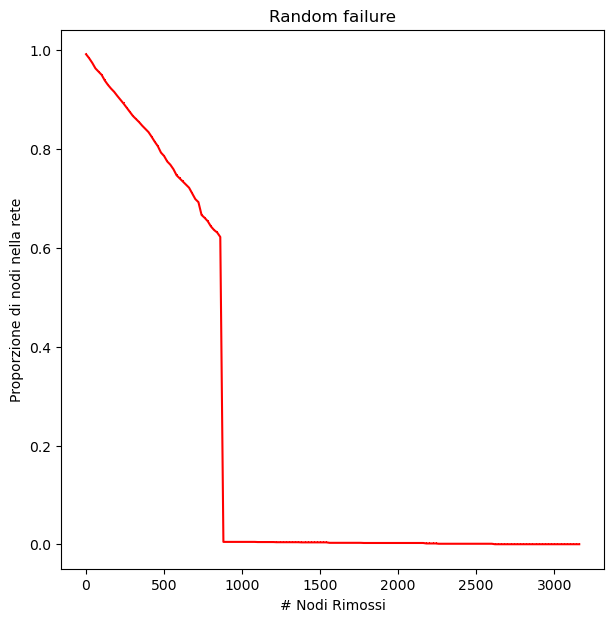

In [460]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.title('Random failure')
plt.xlabel('# Nodi Rimossi')
plt.ylabel('Proporzione di nodi nella rete')
plt.plot(num_nodes_removed, random_attack_core_proportions, marker=',', color="red")

### Attacco mirato

La simulazione di un attacco mirato è simile, tranne per il fatto che invece di scegliere in modo casuale, selezioneremo gli M nodi più centrali a ogni passo. 
Per fare ciò l'idea è di utilizzare qualcosa di simile alla funzione max utilizzata in precedenza per ottenere il nodo più centrale, ma in grado di ottenere i primi M nodi più centrali

Quindi ad ogni passo sarà importante ordinare i nodi per grado e rimuovere i primi M

In [461]:
# esempio di funzionamento
G_copy = G.copy()
M = 10
nodes_sorted_by_degree = sorted(G_copy.nodes, key=G.degree, reverse=True)
top_degree_nodes = nodes_sorted_by_degree[:M]
top_degree_nodes

['AMS', 'FRA', 'CDG', 'IST', 'ATL', 'ORD', 'PEK', 'MUC', 'DFW', 'DME']

In [462]:
N = G.number_of_nodes()
number_of_steps = 150
M = N // number_of_steps  #Questo operatore divide il primo argomento per il secondo e arrotonda il risultato al numero intero più vicino
print(M)
num_nodes_removed_atk = range(0, N, M)
G_copy = G.copy()
targeted_attack_core_proportions = []
for nodes_removed in num_nodes_removed_atk:
    # Measure the relative size of the network core
    core = next(nx.connected_components(G_copy))
    core_proportion = len(core) / N
    targeted_attack_core_proportions.append(core_proportion)
    
    # If there are more than M nodes, select top M nodes and remove them
    if G_copy.number_of_nodes() > M:
        nodes_sorted_by_degree = sorted(G_copy.nodes, key=G_copy.degree, reverse=True)
        nodes_to_remove = nodes_sorted_by_degree[:M]
        G_copy.remove_nodes_from(nodes_to_remove)

21


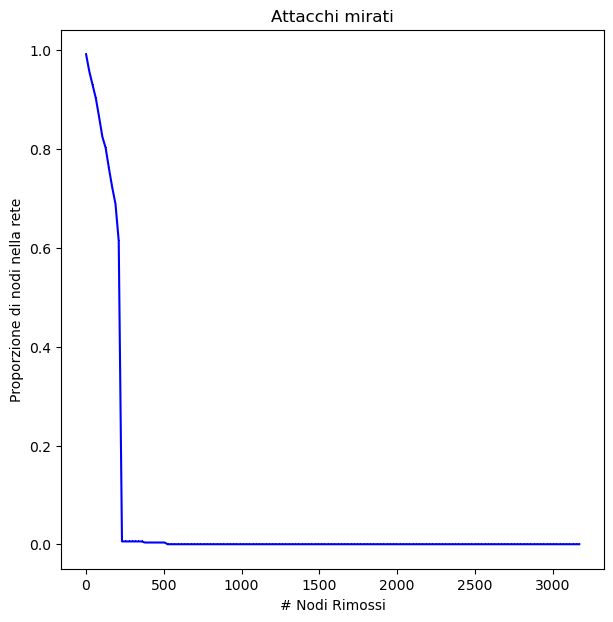

In [463]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.title('Attacchi mirati')
plt.xlabel('# Nodi Rimossi')
plt.ylabel('Proporzione di nodi nella rete')
plt.plot(num_nodes_removed_atk, targeted_attack_core_proportions, marker=',', color="blue")

### Plot delle differenze

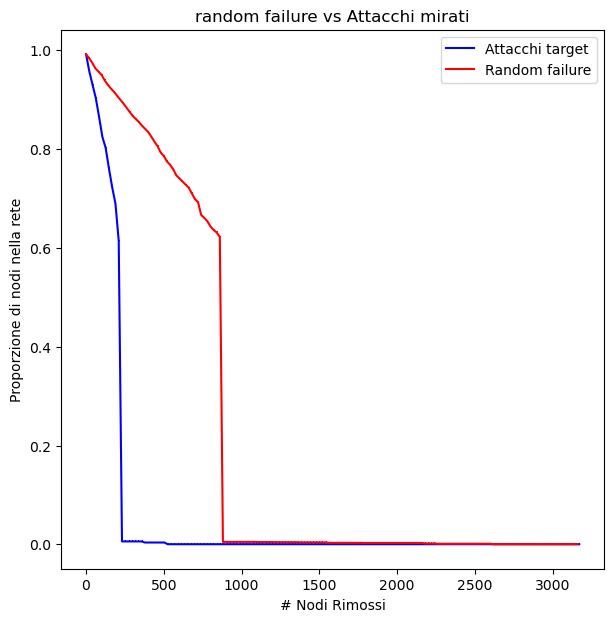

In [464]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.title('random failure vs Attacchi mirati')
plt.xlabel('# Nodi Rimossi')
plt.ylabel('Proporzione di nodi nella rete')
plt.plot(num_nodes_removed_atk, targeted_attack_core_proportions, marker=',', color="blue", label="Attacchi target")
plt.plot(num_nodes_removed, random_attack_core_proportions, marker=',', color="red", label="Random failure")
plt.legend()